# Yelp Data Challenge - Data Preprocessing

BitTiger DS501

Jun 2017

## Dataset Introduction

[Yelp Dataset Challenge](https://www.yelp.com/dataset_challenge)

The Challenge Dataset:

    4.1M reviews and 947K tips by 1M users for 144K businesses
    1.1M business attributes, e.g., hours, parking availability, ambience.
    Aggregated check-ins over time for each of the 125K businesses
    200,000 pictures from the included businesses

Cities:

    U.K.: Edinburgh
    Germany: Karlsruhe
    Canada: Montreal and Waterloo
    U.S.: Pittsburgh, Charlotte, Urbana-Champaign, Phoenix, Las Vegas, Madison, Cleveland

Files:

    yelp_academic_dataset_business.json
    yelp_academic_dataset_checkin.json
    yelp_academic_dataset_review.json
    yelp_academic_dataset_tip.json
    yelp_academic_dataset_user.json

Notes on the Dataset

    Each file is composed of a single object type, one json-object per-line.
    Take a look at some examples to get you started: https://github.com/Yelp/dataset-examples.



## Read data from file and load to Pandas DataFrame

**Warning**: Loading all the 1.8 GB data into Pandas at a time takes long time and a lot of memory!

In [13]:
import json
import pandas as pd

In [17]:
file_business, file_checkin, file_review, file_tip, file_user = [
    'yelp_dataset_challenge_round10/business.json',
    'yelp_dataset_challenge_round10/checkin.json',
    'yelp_dataset_challenge_round10/review.json',
    'yelp_dataset_challenge_round10/tip.json',
    'yelp_dataset_challenge_round10/user.json'
]

#### Business Data

In [61]:
with open(file_business) as f:
    df_business = pd.DataFrame(json.loads(line) for line in f)

In [67]:
df_business.head(4)

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,691 Richmond Rd,"{'RestaurantsPriceRange2': 2, 'BusinessParking...",YDf95gJZaq05wvo7hTQbbQ,"[Shopping, Shopping Centers]",Richmond Heights,"{'Monday': '10:00-21:00', 'Tuesday': '10:00-21...",1,41.541716,-81.493116,Richmond Town Square,,44143,17,2.0,OH
1,2824 Milton Rd,"{'GoodForMeal': {'dessert': False, 'latenight'...",mLwM-h2YhXl2NCgdS84_Bw,"[Food, Soul Food, Convenience Stores, Restaura...",Charlotte,"{'Monday': '10:00-22:00', 'Tuesday': '10:00-22...",0,35.236870,-80.741976,South Florida Style Chicken & Ribs,Eastland,28215,4,4.5,NC
2,337 Danforth Avenue,"{'BusinessParking': {'garage': False, 'street'...",v2WhjAB3PIBA8J8VxG3wEg,"[Food, Coffee & Tea]",Toronto,"{'Monday': '10:00-19:00', 'Tuesday': '10:00-19...",0,43.677126,-79.353285,The Tea Emporium,Riverdale,M4K 1N7,7,4.5,ON
3,"7702 E Doubletree Ranch Rd, Ste 300",{},CVtCbSB1zUcUWg-9TNGTuQ,"[Professional Services, Matchmakers]",Scottsdale,"{'Friday': '9:00-17:00', 'Tuesday': '9:00-17:0...",1,33.565082,-111.916400,TRUmatch,,85258,3,3.0,AZ


In [20]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156639 entries, 0 to 156638
Data columns (total 15 columns):
address         156639 non-null object
attributes      156639 non-null object
business_id     156639 non-null object
categories      156639 non-null object
city            156639 non-null object
hours           156639 non-null object
is_open         156639 non-null int64
latitude        156638 non-null float64
longitude       156638 non-null float64
name            156639 non-null object
neighborhood    156639 non-null object
postal_code     156639 non-null object
review_count    156639 non-null int64
stars           156639 non-null float64
state           156639 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 17.9+ MB


#### Checkin Data

In [21]:
with open(file_checkin) as f:
    df_checkin = pd.DataFrame(json.loads(line) for line in f)
df_checkin.head(2)

,business_id,time
0,7KPBkxAOEtb3QeIL9PEErg,"{'Thursday': {'21:00': 4, '1:00': 1, '4:00': 1..."
1,kREVIrSBbtqBhIYkTccQUg,"{'Monday': {'13:00': 1}, 'Thursday': {'20:00':..."


#### Review Data

In [22]:
with open(file_review) as f:
    df_review = pd.DataFrame(json.loads(line) for line in f)
df_review.head(2)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,uYHaNptLzDLoV_JZ_MuzUA,0,2016-07-12,0,VfBHSwC5Vz_pbFluy07i9Q,5,My girlfriend and I stayed here for 3 nights a...,0,cjpdDjZyprfyDG3RlkVG3w
1,uYHaNptLzDLoV_JZ_MuzUA,0,2016-10-02,0,3zRpneRKDsOPq92tq7ybAA,3,If you need an inexpensive place to stay for a...,0,bjTcT8Ty4cJZhEOEo01FGA


#### Tip Data

In [23]:
with open(file_tip) as f:
    df_tip = pd.DataFrame(json.loads(line) for line in f)
df_tip.head(2)

,business_id,date,likes,text,user_id
0,tJRDll5yqpZwehenzE2cSg,2012-07-15,0,Get here early enough to have dinner.,zcTZk7OG8ovAmh_fenH21g
1,jH19V2I9fIslnNhDzPmdkA,2015-08-12,0,Great breakfast large portions and friendly wa...,ZcLKXikTHYOnYt5VYRO5sg


#### User Data

In [24]:
with open(file_user) as f:
    df_user = pd.DataFrame(json.loads(line) for line in f)
df_user.head(2)

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
0,3.80,5174,284,5174,5175,78,299,1435,7829,7397,...,16856,"[2014, 2016, 2013, 2011, 2012, 2015, 2010, 2017]",209,"[M19NwFwAXKRZzt8koF11hQ, QRcMZ8pJJBBZaKubHOoMD...",16605,Cin,272,17019,lsSiIjAKVl-QRxKjRErBeg,2010-07-13
1,3.94,1556,211,1556,1285,101,134,1295,162,2134,...,40110,"[2014, 2017, 2011, 2012, 2015, 2009, 2013, 200...",835,"[eoSSJzdprj3jxXyi94vDXg, QF0urZa-0bxga17ZeY-9l...",10882,Andrea,2559,83681,om5ZiponkpRqUNa3pVPiRg,2006-01-18


## Filter data by city and category

#### Create filters/masks

* create filters that selects business 
    * that are located in "Las Vegas"
    * that contains "Restaurants" in their category (You may need to filter null categories first)

In [125]:
# Create Pandas DataFrame filters
filters1=df_business.categories.astype('str').str.contains("Restaurants",case=False)==True
filters2=df_business.city == 'Las Vegas'


In [127]:
# Create filtered DataFrame, and name it df_filtered
df_filtered = df_business.loc[filters1 & filters2]
df_filtered.head(5)

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
58,2400 E Lake Mead Blvd,"{'RestaurantsTableService': True, 'GoodForMeal...",LDMCrFlGIFUN6L-FEFgzWg,"[Restaurants, American (Traditional), Mexican,...",Las Vegas,"{'Monday': '9:00-23:00', 'Tuesday': '9:00-23:0...",1,36.196203,-115.116799,El Pollo Loco,,89030,12,3.0,NV
64,4190 S Rainbow Blvd,"{'RestaurantsPriceRange2': 1, 'RestaurantsAtti...",QTH_XGh4rWYdd0fTW-tUDw,"[Mexican, Restaurants]",Las Vegas,{},0,36.112519,-115.242605,Baja Fresh Mexican Grill,Spring Valley,89103,7,3.5,NV
90,6325 E Russell Rd,"{'BusinessAcceptsCreditCards': True, 'Restaura...",DiA78qPtp6rfRNdomzjBbw,"[Chinese, Food, Convenience Stores, Restaurants]",Las Vegas,{},1,36.083384,-115.033995,Joshan Filipino Oriental Market,Southeast,89122,17,3.5,NV
107,"1203 E Charleston Blvd, Ste 140","{'RestaurantsTableService': True, 'GoodForMeal...",YTqtM2WFhcMZGeAGA08Cfg,"[Seafood, Restaurants, Specialty Food, Ethnic ...",Las Vegas,"{'Monday': '10:30-21:00', 'Tuesday': '10:30-21...",1,36.159363,-115.135949,Mariscos Playa Escondida,Downtown,89104,330,4.5,NV
116,"South Point Hotel & Casino, 9777 S Las Vegas Blvd","{'RestaurantsTableService': True, 'GoodForMeal...",Oto60yDwk1z72WmfWEYrjg,"[Food, Restaurants, Mexican]",Las Vegas,"{'Sunday': '11:00-23:00', 'Wednesday': '10:00-...",1,36.012191,-115.173993,Baja Miguel's,Southeast,89183,175,3.0,NV


#### Keep relevant columns

* only keep some useful columns
    * business_id
    * name
    * categories
    * stars

In [128]:
selected_features = [u'business_id', u'name', u'categories', u'stars']

In [129]:
# Make a DataFrame that contains only the abovementioned columns, and name it as df_selected_business
df_selected_business = df_filtered[selected_features]

In [130]:
# Rename the column name "stars" to "avg_stars" to avoid naming conflicts with review dataset
df_selected_business.columns = ['business_id', 'name', 'categories', 'avg_stars']

In [131]:
# Inspect your DataFrame
df_selected_business.head(10)

,business_id,name,categories,avg_stars
58,LDMCrFlGIFUN6L-FEFgzWg,El Pollo Loco,"[Restaurants, American (Traditional), Mexican,...",3.0
64,QTH_XGh4rWYdd0fTW-tUDw,Baja Fresh Mexican Grill,"[Mexican, Restaurants]",3.5
90,DiA78qPtp6rfRNdomzjBbw,Joshan Filipino Oriental Market,"[Chinese, Food, Convenience Stores, Restaurants]",3.5
107,YTqtM2WFhcMZGeAGA08Cfg,Mariscos Playa Escondida,"[Seafood, Restaurants, Specialty Food, Ethnic ...",4.5
116,Oto60yDwk1z72WmfWEYrjg,Baja Miguel's,"[Food, Restaurants, Mexican]",3.0
223,mUk-0jToBuzk4KaDXp-uew,Taza Indian Kitchen,"[Indian, Pakistani, Restaurants]",3.0
242,1CP8aJa8ILlfM5deroar0Q,Wingstop,"[Chicken Wings, American (New), Restaurants]",3.0
271,TYGVaav4hWZioQlk9Ig78A,Cody's Smokin' Barbecue,"[Restaurants, Barbeque]",4.5
278,Wbi-x-1Nbn6LFCMOSN6F5Q,Cafe Rio,"[Restaurants, Mexican]",2.5
302,W-3Sy3fy85mQdd0ZNFKIiw,Applebee's,"[Sports Bars, Nightlife, Burgers, Bars, Americ...",2.5


#### Save results to csv files

In [132]:
# Save to ./data/selected_business.csv for your next task
selected_data_csv = 'yelp_dataset_challenge_round10/selected_business.csv'
df_selected_business.to_csv(selected_data_csv, index=False)

In [133]:
# Try reload the csv file to check if everything works fine
df_selected_business = pd.read_csv('yelp_dataset_challenge_round10/selected_business.csv')
df_selected_business.head(10)

,business_id,name,categories,avg_stars
0,LDMCrFlGIFUN6L-FEFgzWg,El Pollo Loco,"['Restaurants', 'American (Traditional)', 'Mex...",3.0
1,QTH_XGh4rWYdd0fTW-tUDw,Baja Fresh Mexican Grill,"['Mexican', 'Restaurants']",3.5
2,DiA78qPtp6rfRNdomzjBbw,Joshan Filipino Oriental Market,"['Chinese', 'Food', 'Convenience Stores', 'Res...",3.5
3,YTqtM2WFhcMZGeAGA08Cfg,Mariscos Playa Escondida,"['Seafood', 'Restaurants', 'Specialty Food', '...",4.5
4,Oto60yDwk1z72WmfWEYrjg,Baja Miguel's,"['Food', 'Restaurants', 'Mexican']",3.0
5,mUk-0jToBuzk4KaDXp-uew,Taza Indian Kitchen,"['Indian', 'Pakistani', 'Restaurants']",3.0
6,1CP8aJa8ILlfM5deroar0Q,Wingstop,"['Chicken Wings', 'American (New)', 'Restauran...",3.0
7,TYGVaav4hWZioQlk9Ig78A,Cody's Smokin' Barbecue,"['Restaurants', 'Barbeque']",4.5
8,Wbi-x-1Nbn6LFCMOSN6F5Q,Cafe Rio,"['Restaurants', 'Mexican']",2.5
9,W-3Sy3fy85mQdd0ZNFKIiw,Applebee's,"['Sports Bars', 'Nightlife', 'Burgers', 'Bars'...",2.5


### Use the "business_id" column to filter review data

* We want to make a DataFrame that contain and only contain the reviews about the business entities we just obtained

#### Load review dataset

In [134]:
with open(file_review) as f:
    df_review = pd.DataFrame(json.loads(line) for line in f)
df_review.head(2)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,uYHaNptLzDLoV_JZ_MuzUA,0,2016-07-12,0,VfBHSwC5Vz_pbFluy07i9Q,5,My girlfriend and I stayed here for 3 nights a...,0,cjpdDjZyprfyDG3RlkVG3w
1,uYHaNptLzDLoV_JZ_MuzUA,0,2016-10-02,0,3zRpneRKDsOPq92tq7ybAA,3,If you need an inexpensive place to stay for a...,0,bjTcT8Ty4cJZhEOEo01FGA


#### Prepare dataframes to be joined, - on business_id

In [135]:
# Prepare the business dataframe and set index to column "business_id", and name it as df_left
df_left = df_selected_business.set_index('business_id')

In [136]:
# Prepare the review dataframe and set index to column "business_id", and name it as df_right
df_right = df_review.set_index('business_id')

#### Join! and reset index

In [143]:
# Join df_left and df_right. What type of join?
df_business_review = df_left.merge(df_right, left_index = True, right_index = True, how='left')

In [144]:
# You may want to reset the index 
df_business_review = df_business_review.reset_index()
df_business_review.head()

,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
0,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Steakhouses', 'Cajun/Creole', 'Restaurants']",4.0,1,2016-05-17,0,0Qc1THNHSapDL7cv-ZzW5g,5,What can I say.. Wowzers! Probably one of the ...,0,4LxKRRIikhr65GfPDW626w
1,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Steakhouses', 'Cajun/Creole', 'Restaurants']",4.0,1,2011-03-31,0,3PjT8n8rpkwLRuObXLmm3w,2,We went in with high hopes after a friend reco...,0,96aWRa-gy1RrsrFQURagvg
2,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Steakhouses', 'Cajun/Creole', 'Restaurants']",4.0,0,2014-12-02,0,U7U8VTShZ4pdPbdtjuhVcg,3,"I want to give this place 2 stars, but because...",0,FQTfUYsCnBryER6L8NFyYA
3,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Steakhouses', 'Cajun/Creole', 'Restaurants']",4.0,0,2017-01-20,0,L8lo5SKXfZRlbn1bpPiC9w,5,Went here for guys weekend. Unbelievable. Ravi...,0,nT8zgjoc-PbdBoQsFEXFLw
4,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Steakhouses', 'Cajun/Creole', 'Restaurants']",4.0,52,2016-09-25,30,6eUT3IwwWPP3CZkAhxqOIw,5,"One word my friends: tableside!!! Yes, tablesi...",56,7RlyCglsIzhBn081inwvcg


#### We further filter data by date, e.g. keep comments from last 2 years

* Otherwise your laptop may crush on memory when running machine learning algorithms
* Purposefully ignoring the reviews made too long time ago

In [148]:
# Make a filter that selects date after 2015-01-20
date_filter = df_business_review['date'] > '2015-1-20'

In [150]:
# Filter the joined DataFrame and name it as df_final
df_final = df_business_review.loc[date_filter]
df_final.head()

,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
0,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Steakhouses', 'Cajun/Creole', 'Restaurants']",4.0,1,2016-05-17,0,0Qc1THNHSapDL7cv-ZzW5g,5,What can I say.. Wowzers! Probably one of the ...,0,4LxKRRIikhr65GfPDW626w
3,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Steakhouses', 'Cajun/Creole', 'Restaurants']",4.0,0,2017-01-20,0,L8lo5SKXfZRlbn1bpPiC9w,5,Went here for guys weekend. Unbelievable. Ravi...,0,nT8zgjoc-PbdBoQsFEXFLw
4,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Steakhouses', 'Cajun/Creole', 'Restaurants']",4.0,52,2016-09-25,30,6eUT3IwwWPP3CZkAhxqOIw,5,"One word my friends: tableside!!! Yes, tablesi...",56,7RlyCglsIzhBn081inwvcg
8,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Steakhouses', 'Cajun/Creole', 'Restaurants']",4.0,1,2017-02-12,0,3cnTdE45VrsS0o4cVhfGog,3,"Located inside my favorite hotel Venetian, Del...",1,rOIrilMC7VFwFVBeQNiKMw
10,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Steakhouses', 'Cajun/Creole', 'Restaurants']",4.0,0,2016-10-30,0,tYrSbjX3QgZGBZuQ3n8g6w,5,"After the most incredible service, delicious m...",2,PiWlV_UC_-SXqyxQM9fAtw


#### Take a glance at the final dataset

* Do more EDA here as you like!

In [151]:
import matplotlib.pyplot as plt

% matplotlib inline

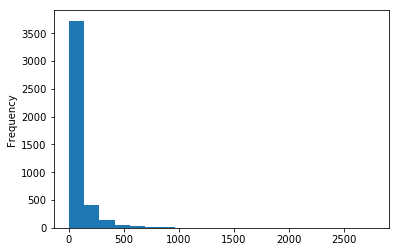

In [162]:
# e.g. calculate counts of reviews per business entity, and plot it
df_final['business_id'].value_counts().plot.hist(bins=20)

## Save your preprocessed dataset to csv file

* Respect your laptop's hard work! You don't want to make it run everything again.

In [154]:
# Save to ./data/last_2_years_restaurant_reviews.csv for your next task
selected_review_csv = 'yelp_dataset_challenge_round10/last_2_years_restaurant_reviews.csv'
df_final.to_csv(selected_review_csv, index=False)